# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [3]:
import pandas as pd
data = pd.read_csv("/content/HEALTH_MORTALITY_28102021102010718.csv")

data.shape

(57434, 15)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [4]:
unique_counts = data.nunique()
unique_counts_sorted = unique_counts.sort_values(ascending=False)
print("Number of unique values in each column:")
print(unique_counts_sorted)
most_diverse_column = unique_counts_sorted.index[0]
print(f"\nColumn with most unique values: {most_diverse_column}")
print(f"Number of unique values: {unique_counts_sorted[0]}")
if most_diverse_column.lower().find('id') != -1:
    second_most_diverse = unique_counts_sorted.index[1]
    print(f"\nSecond most diverse column (excluding ID): {second_most_diverse}")
    print(f"Number of unique values: {unique_counts_sorted[1]}")

Number of unique values in each column:
Value          6224
WEEK             53
Week number      53
COUNTRY          33
Country          33
AGE               4
Age               4
GENDER            3
Gender            3
VARIABLE          2
Variable          2
YEAR              2
Year              2
Flag Codes        1
Flags             1
dtype: int64

Column with most unique values: Value
Number of unique values: 6224


<ipython-input-4-48d4ecf3a3f2>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Number of unique values: {unique_counts_sorted[0]}")


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [5]:
redundant_columns = []
redundant_values = {}

for column in data.columns:
    unique_values = data[column].unique()
    if len(unique_values) == 1:
        redundant_columns.append(column)
        redundant_values[column] = unique_values[0]
if redundant_columns:
    print("Columns with same value in every row:")
    for column in redundant_columns:
        print(f"Column '{column}' has value '{redundant_values[column]}' in all rows")
else:
    print("No columns found where all rows have the same value")
columns_single_value = data.columns[data.nunique() == 1]
if not columns_single_value.empty:
    print("\nVerification using nunique method:")
    print("Columns with only one unique value:", list(columns_single_value))

No columns found where all rows have the same value

Verification using nunique method:
Columns with only one unique value: ['Flag Codes', 'Flags']


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

Numeric columns in your dataset:
WEEK:
  Range: 1 to 53
  Mean: 23.36
  Median: 22.0

Week number:
  Range: 1 to 53
  Mean: 23.36
  Median: 22.0

YEAR:
  Range: 2020.0 to 2021.0
  Mean: 2020.40
  Median: 2020.0

Year:
  Range: 2020.0 to 2021.0
  Mean: 2020.40
  Median: 2020.0

Value:
  Range: -3536.8 to 30619.2
  Mean: 101.90
  Median: 3.6



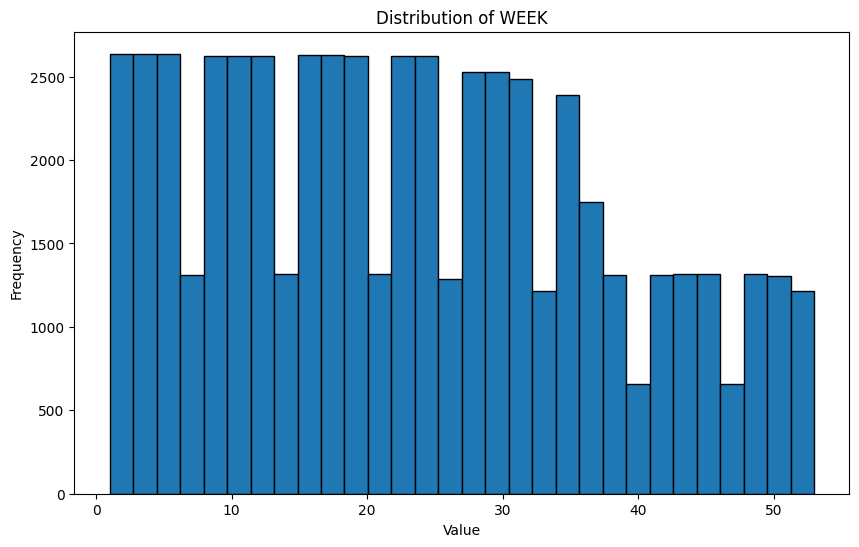

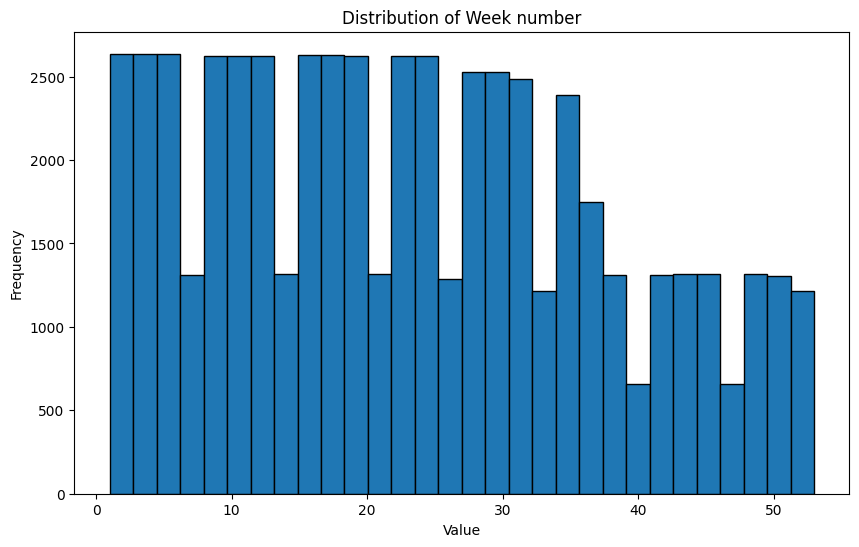

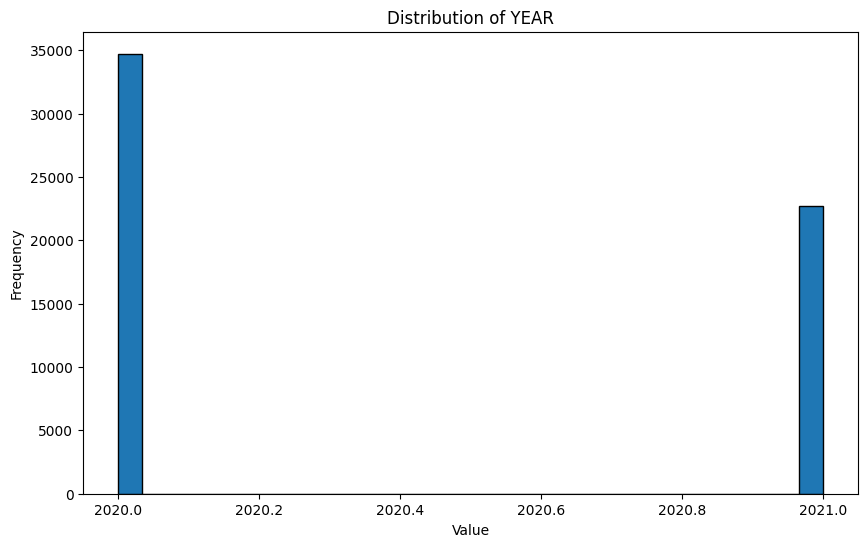

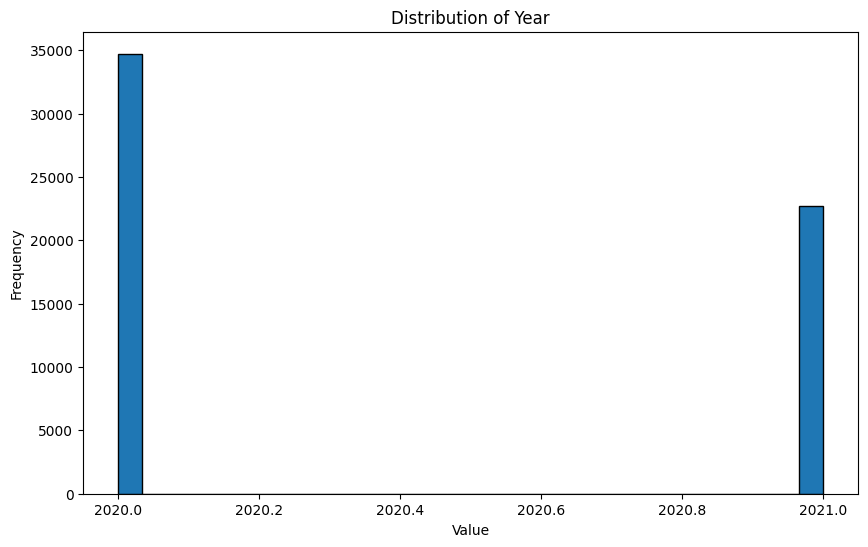

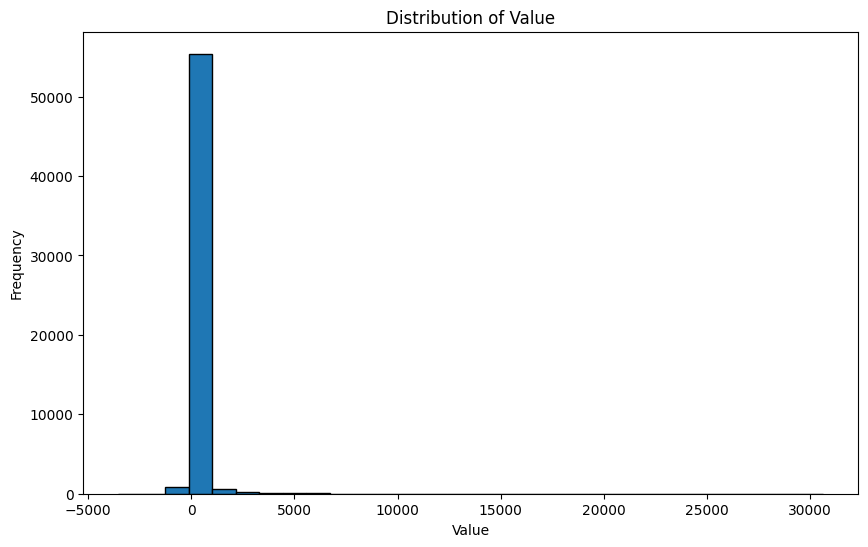

In [6]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns in your dataset:")
for col in numeric_columns:
    print(f"{col}:")
    print(f"  Range: {data[col].min()} to {data[col].max()}")
    print(f"  Mean: {data[col].mean():.2f}")
    print(f"  Median: {data[col].median()}")
    print()

import matplotlib.pyplot as plt
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

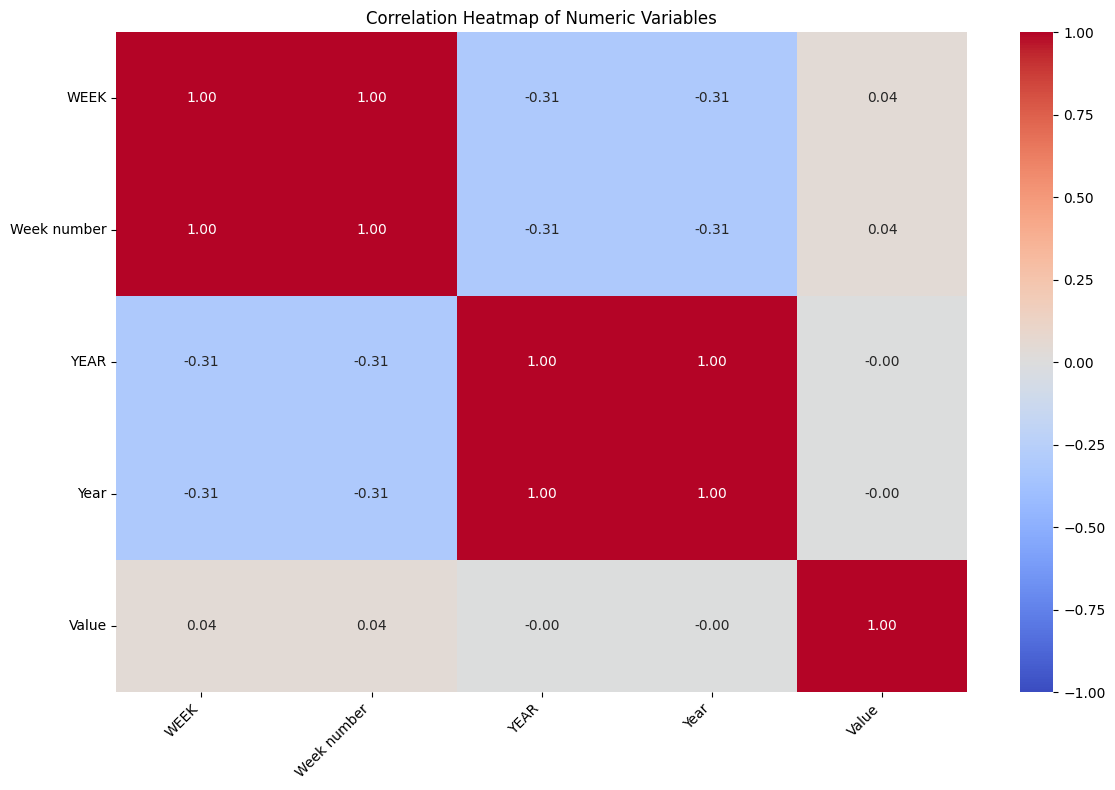

In [7]:
import numpy as np
import seaborn as sns

# Get numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlations
correlations = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlations,
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Blue-red color scheme
            center=0,  # Center the colormap at 0
            vmin=-1, vmax=1,  # Set the range of correlations
            fmt='.2f')  # Format correlation values to 2 decimal places
plt.title('Correlation Heatmap of Numeric Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



---



## Submitting Your Work

Submit your work as usual.